<a href="https://colab.research.google.com/github/minzx23/kk/blob/main/%EC%97%AD%EC%A0%84%ED%8C%8C_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
import pandas as pd

file_path = '/content/gdrive/My Drive/Iris.xlsx'
data_frame = pd.read_excel(file_path)

numpy_array = data_frame.to_numpy()


0/1000 cost:0.013017714687843471
100/1000 cost:0.20453852966342567
200/1000 cost:0.3359310843507029
300/1000 cost:0.4488316713362219
400/1000 cost:0.09852378858824383
500/1000 cost:0.1591746789017205
600/1000 cost:0.310545190095029
700/1000 cost:0.017380245502029847
800/1000 cost:0.04239240495638742
900/1000 cost:0.1498745258102689
1000/1000 cost:0.2671946923745931


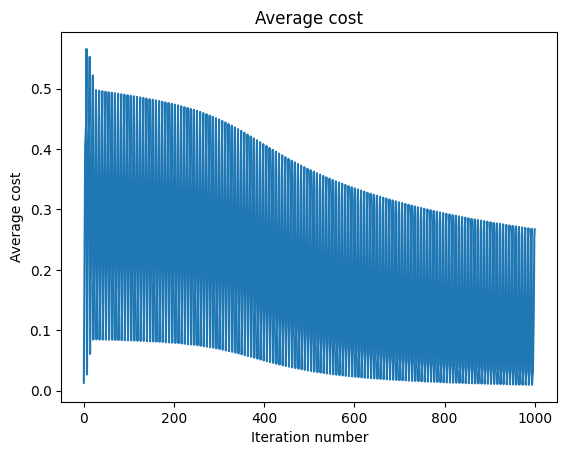

1
[0.93432576]
0
[0.10278057]
0
[0.04238141]
0
[0.42817563]
1
[0.71140216]
1
[0.24574844]
0
[0.11642636]


In [23]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))
def feed_forward(x,w1,w2,b1,b2):
  a1=x
  z2=np.dot(w1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(w2,a2)+b2
  a3=sigmoid(z3)
  return a1,a2,a3,z2,z3
node_size={'input_layer_size': 3,
           'hidden_layer_size': 3,
           'output_layer_size': 1}

learning_rate=2.0
w2=np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
w1=np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])
X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])
count=0
max_iteration=1000
dataset_size=len(Y)
list_average_cost=[]

while count < max_iteration:
  dw2=np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
  dw1=np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
  db2=np.zeros(node_size['output_layer_size'])
  db1=np.zeros(node_size['hidden_layer_size'])
  average_cost=0
  for x,y in zip(X,Y):
    a1, a2, a3, z2, z3=feed_forward(x,w1,w2,b1,b2)
    #역전파 알고리즘을 실행
    delta3=-(y-a3)*sigmoid_derivative(z3)
    average_cost+=np.linalg.norm((y-a3),2)/dataset_size
    delta2=np.dot(w2.T,delta3)*sigmoid_derivative(z2)
    dw2+=np.dot(delta3[:,np.newaxis],np.transpose(a2[:,np.newaxis]))/dataset_size
    db2+=delta3/dataset_size
    dw1+=np.dot(delta2[:,np.newaxis],np.transpose(a2[:,np.newaxis]))/dataset_size
    db1+= delta2/dataset_size
    #
    w2+=-learning_rate*dw2
    b2+=-learning_rate*db2
    w1+=-learning_rate*dw1
    b1+=-learning_rate*db1
    #
    list_average_cost.append(average_cost)
    if count%100==0:
      print(f'{count}/{max_iteration} cost:{average_cost}')
    count+=1
  #
Figure,ax=plt.subplots(1,1)
ax.title.set_text('Average cost')
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt.show()

for x,y in zip(X,Y):
  a1,a2,a3,z2,z3=feed_forward(x,w1,w2,b1,b2)
  print(y)
  print(a3)